<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/3-NetworkX/SocialNetworkAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SOCIAL NETWORK ANALYSIS**

## **1 Inizializzazione**

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import warnings
import requests
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import collections
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
def draw(G, pos, measures, measure_name):
    
    plt.figure(figsize=(20,20))
    nodes = nx.draw_networkx_nodes(G, pos, node_size=200, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    #labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)
    
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

In [4]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/3-NetworkX/arenas-jazz.edges"
req = requests.get(url)
req = req.text

split = req.split('\n')
splitted = list(split)

dati = pd.DataFrame(splitted, columns = ['archi'])
dati[['nodo1', 'nodo2']] = dati.archi.str.split(",", expand = True)
dati.drop(dati.tail(1).index,inplace=True)

archi = dati.drop(['archi'], axis=1)

In [5]:
G = nx.from_pandas_edgelist(archi, source='nodo1', target='nodo2')

In [54]:
grado = dict(G.degree())
gradi = list(grado.values())
nodes = list(G.nodes)
densita = nx.density(G)
cluster = nx.clustering(G)

In [7]:
print("NODES: ", len(G.nodes))
print("EDGES: ", len(G.edges))
print("RAGGIO: ", nx.radius(G))
print("DIAMETRO: ", nx.diameter(G))
print("DENSITY: ", nx.density(G))
print("IS_CONNECTED: ", nx.is_connected(G))
print("CLUSTERING: ", nx.average_clustering(G))
print("N. OF CYCLE: ",len(nx.cycle_basis(G)))

NODES:  198
EDGES:  2742
RAGGIO:  4
DIAMETRO:  6
DENSITY:  0.14059375480695277
IS_CONNECTED:  True
CLUSTERING:  0.6174507021536301
N. OF CYCLE:  2545


In [8]:
pos = nx.spring_layout(G)
posc = nx.circular_layout(G)
posk = nx.kamada_kawai_layout(G)
poss = nx.spiral_layout(G)

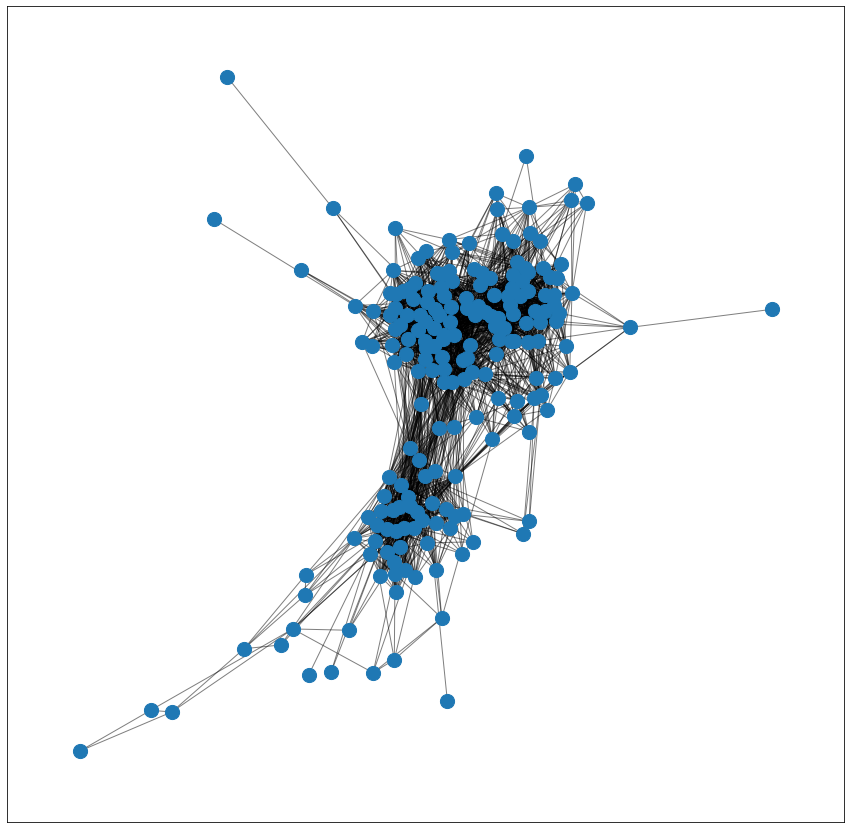

In [9]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos, node_size=200)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

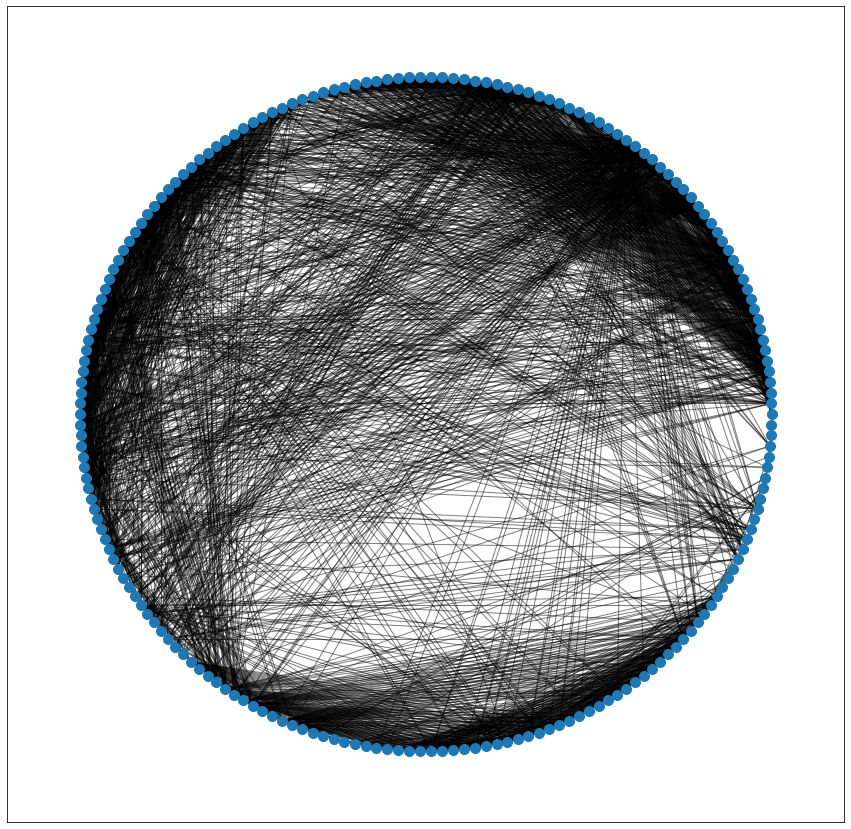

In [10]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posc, node_size=100)
nx.draw_networkx_edges(G, pos=posc, alpha=0.5)
plt.show()

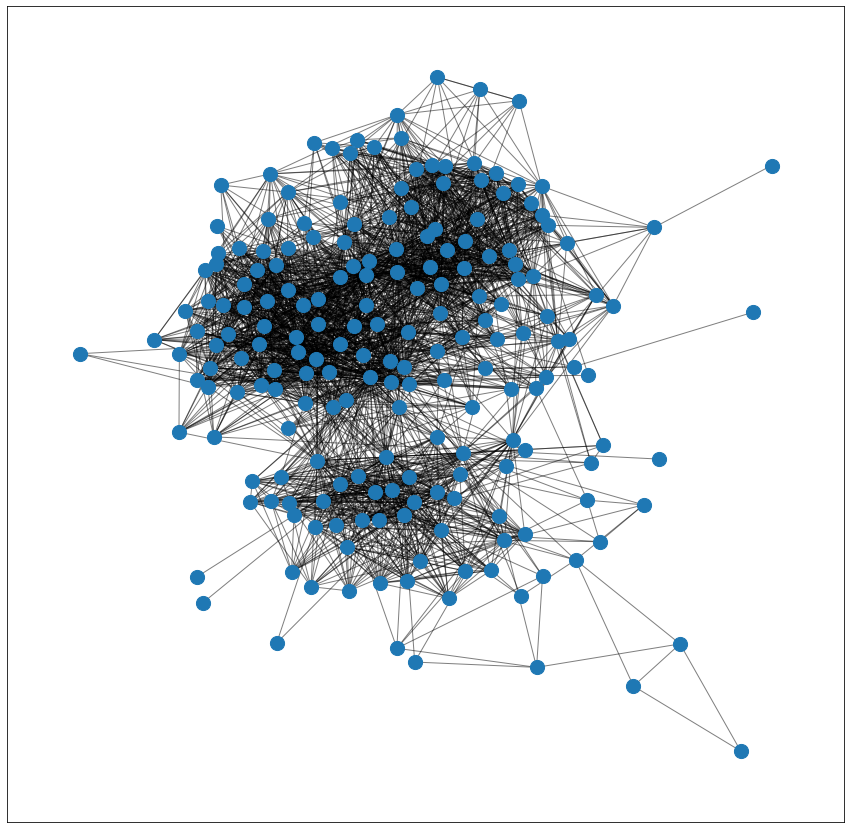

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G, pos=posk, node_size=200)
nx.draw_networkx_edges(G, pos=posk, alpha=0.5)
plt.show()

### **1.1 Analisi del Grado**

In [12]:
print('Standard deviation: {}'.format(np.std(gradi)))
print('Mean: {}'.format(np.mean(gradi)))
print('Median: {}'.format(np.median(gradi)))
print('Min: {}'.format(np.min(gradi)))
print('Max: {}'.format(np.max(gradi)))
print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 17.41035019313416
Mean: 27.696969696969695
Median: 25.0
Min: 1
Max: 100
Assortativity coefficient: 0.020237399275047713


Text(0.5, 0, 'Degree')

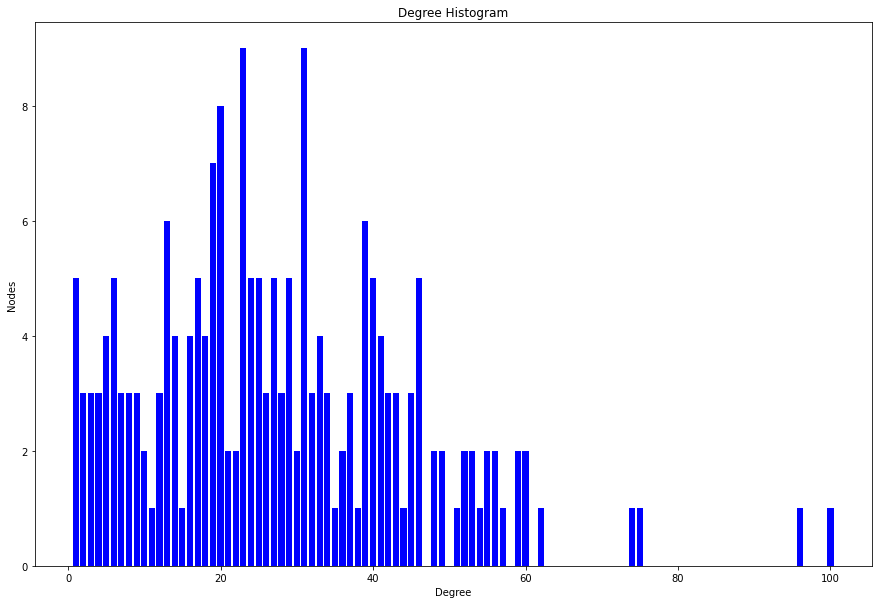

In [13]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.figure(figsize=(15,10))

plt.bar(deg, cnt, width=0.8, color="b")
plt.title("Degree Histogram")
plt.ylabel("Nodes")
plt.xlabel("Degree")

## **2 Centralità**

### **2.1 Degree Centrality**

Quanti neighbors ha ciascun nodo?

In [19]:
ranks = [(k, v) for k, v in sorted(grado.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 100), ('7', 96), ('20', 75), ('23', 74), ('90', 62)]

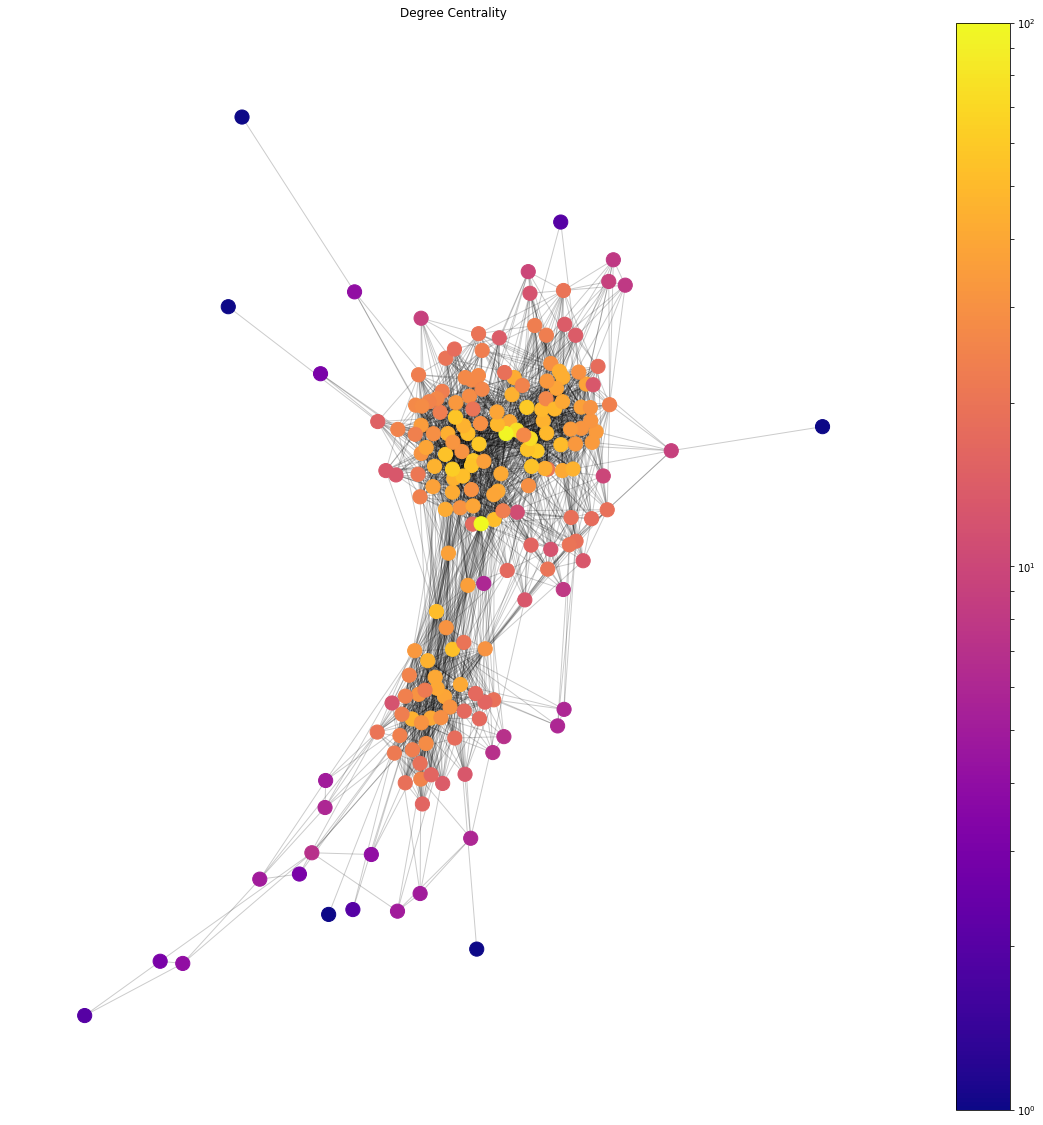

In [20]:
draw(G, pos, grado, 'Degree Centrality')

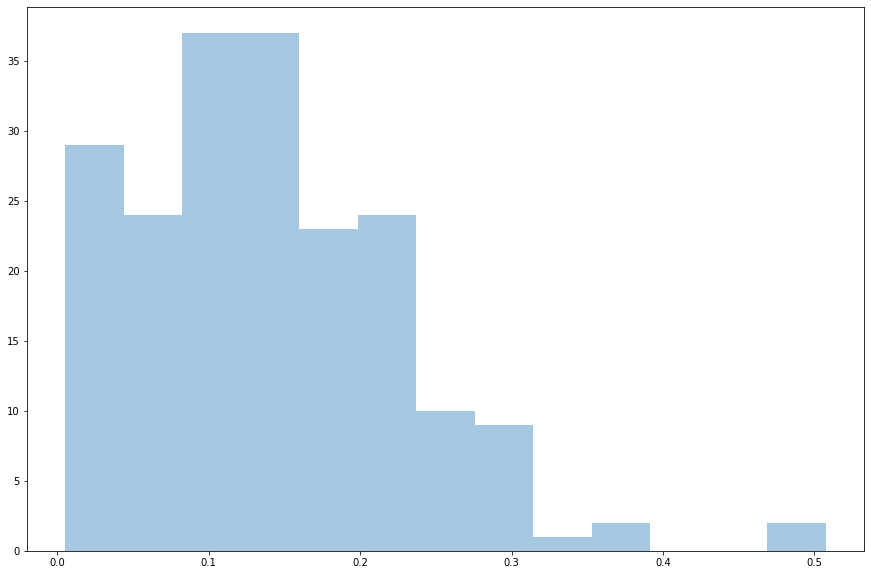

In [21]:
degree = nx.degree_centrality(G)
plt.figure(figsize=(15,10))
sns.distplot(list(degree.values()), kde=False)

### **2.2 Closeness Centrality**


**Farness**: media della lunghezza dei percorsi più brevi verso tutti gli altri nodi

**Closeness**: inversa della Farness (normalizzata per numero di nodi)

In [22]:
closeness = nx.closeness_centrality(G)

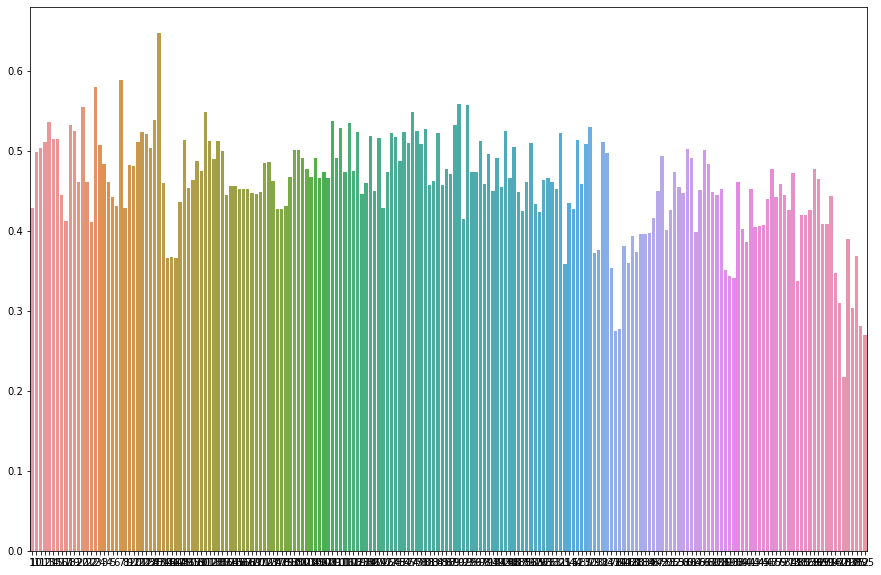

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(x=list(closeness.keys()), y=list(closeness.values()))

In [24]:
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.6480263157894737),
 ('7', 0.5898203592814372),
 ('23', 0.5811209439528023),
 ('90', 0.5596590909090909),
 ('93', 0.5580736543909348)]

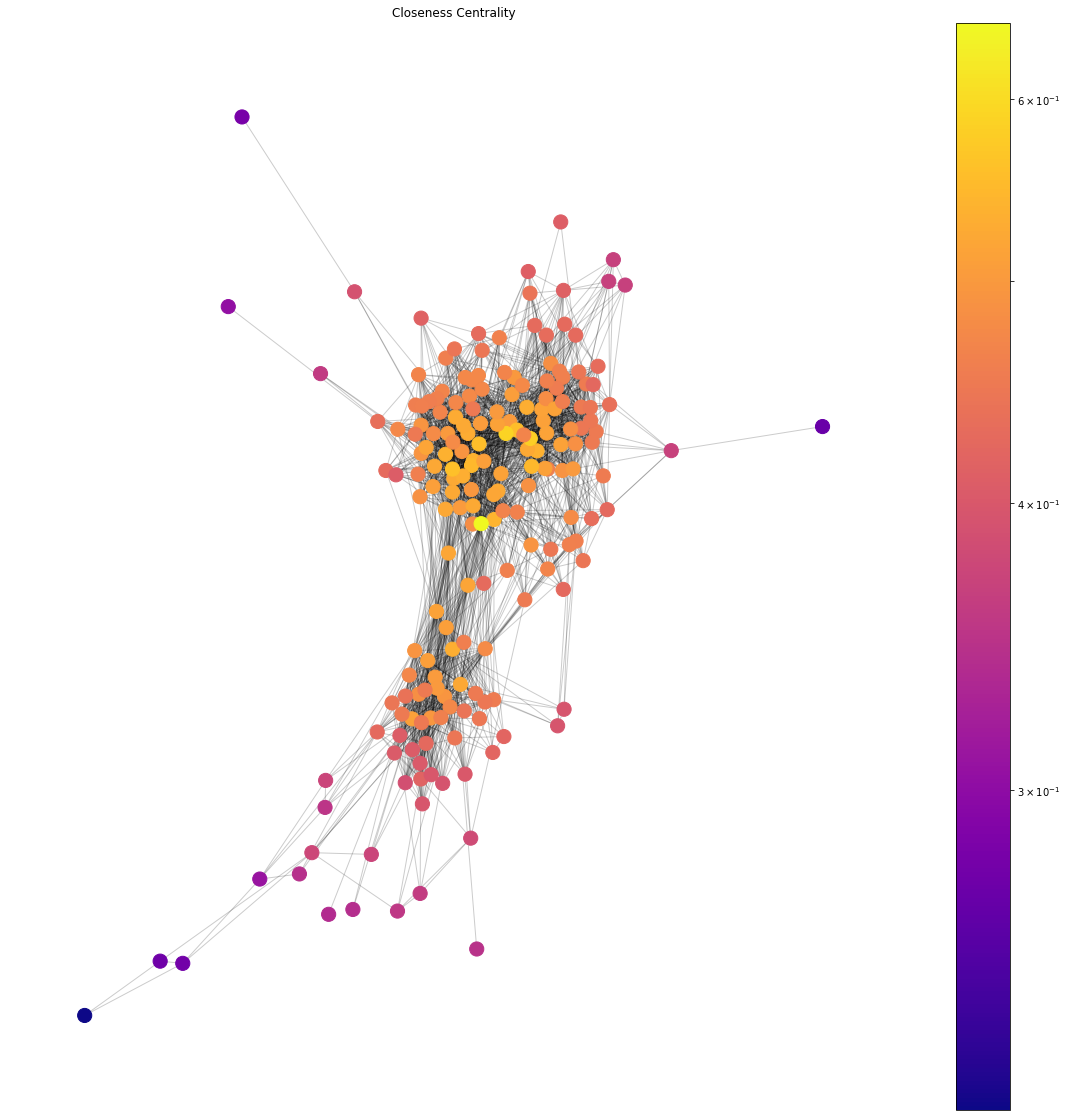

In [25]:
draw(G, pos, closeness, 'Closeness Centrality')

### **2.3 Betweenness Centrality**

Numero di cammini minimi che attraversano un nodo.

**Presupposto**: i vertici importanti sono ponti sui quali fluiscono le informazioni

**In pratica**: se le informazioni si diffondono per cammini minimi, nodi importanti si trovano su molti cammini minimi

In [26]:
betweenness = nx.betweenness_centrality(G)

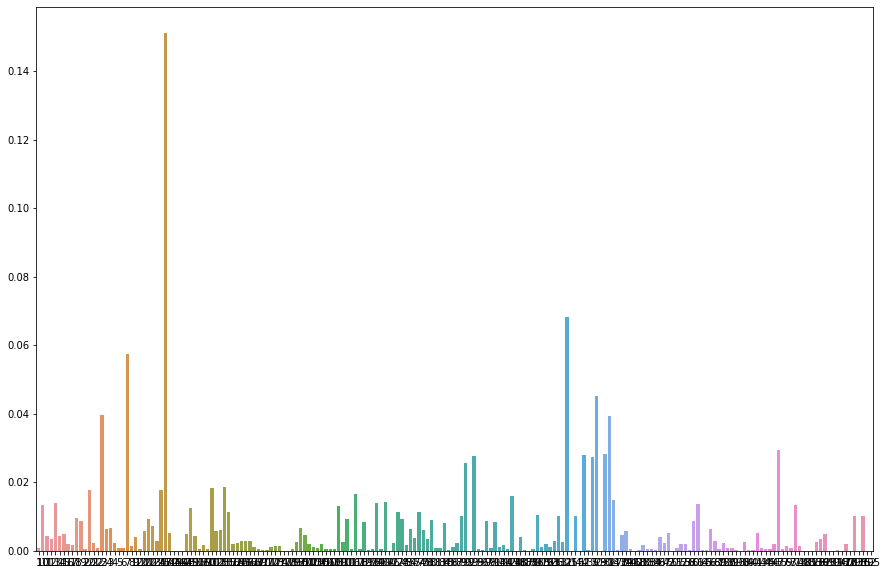

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=list(betweenness.keys()), y=list(betweenness.values()))

In [28]:
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 0.15105615373941586),
 ('31', 0.06829206963519824),
 ('7', 0.057538917986120146),
 ('70', 0.04517867657801444),
 ('23', 0.03960002124911093)]

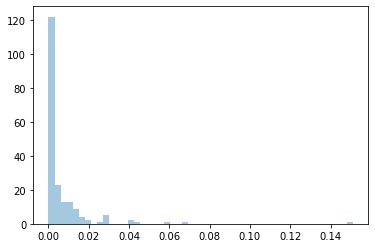

In [29]:
sns.distplot(list(betweenness.values()), kde=False)
#questo per vedere la quantità di nodi con centralità alta e bassa

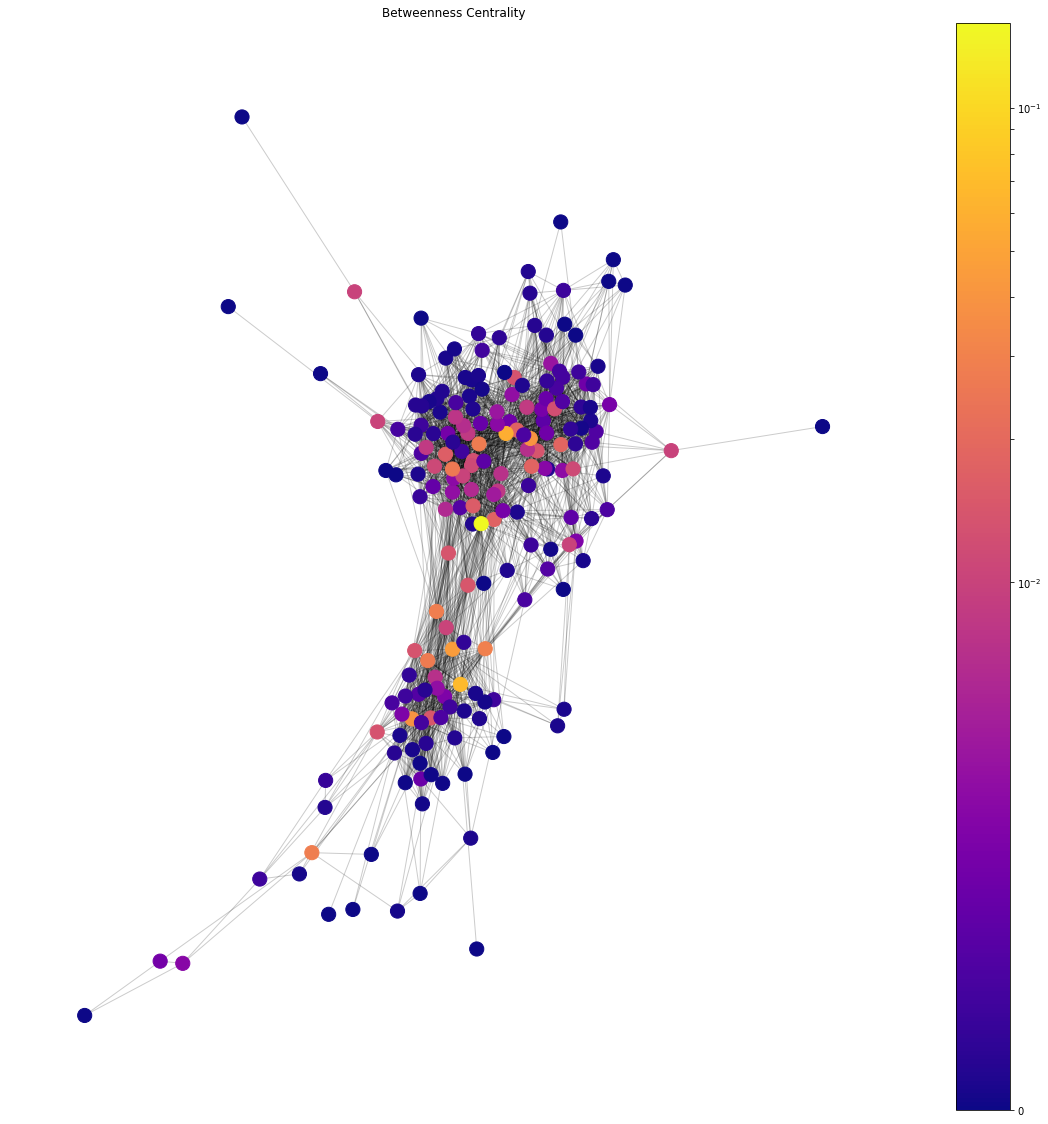

In [30]:
draw(G, pos, betweenness, 'Betweenness Centrality')

### **2.4 Harmonic Centrality**

Media armonica delle distanze geodetiche (percorsi abbreviati) da un dato nodo a tutti gli altri.

In [31]:
harmonic = nx.harmonic_centrality(G)

In [32]:
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
ranks[0:5]

[('67', 147.00000000000003),
 ('7', 140.95000000000002),
 ('23', 132.41666666666666),
 ('20', 130.36666666666656),
 ('90', 126.33333333333327)]

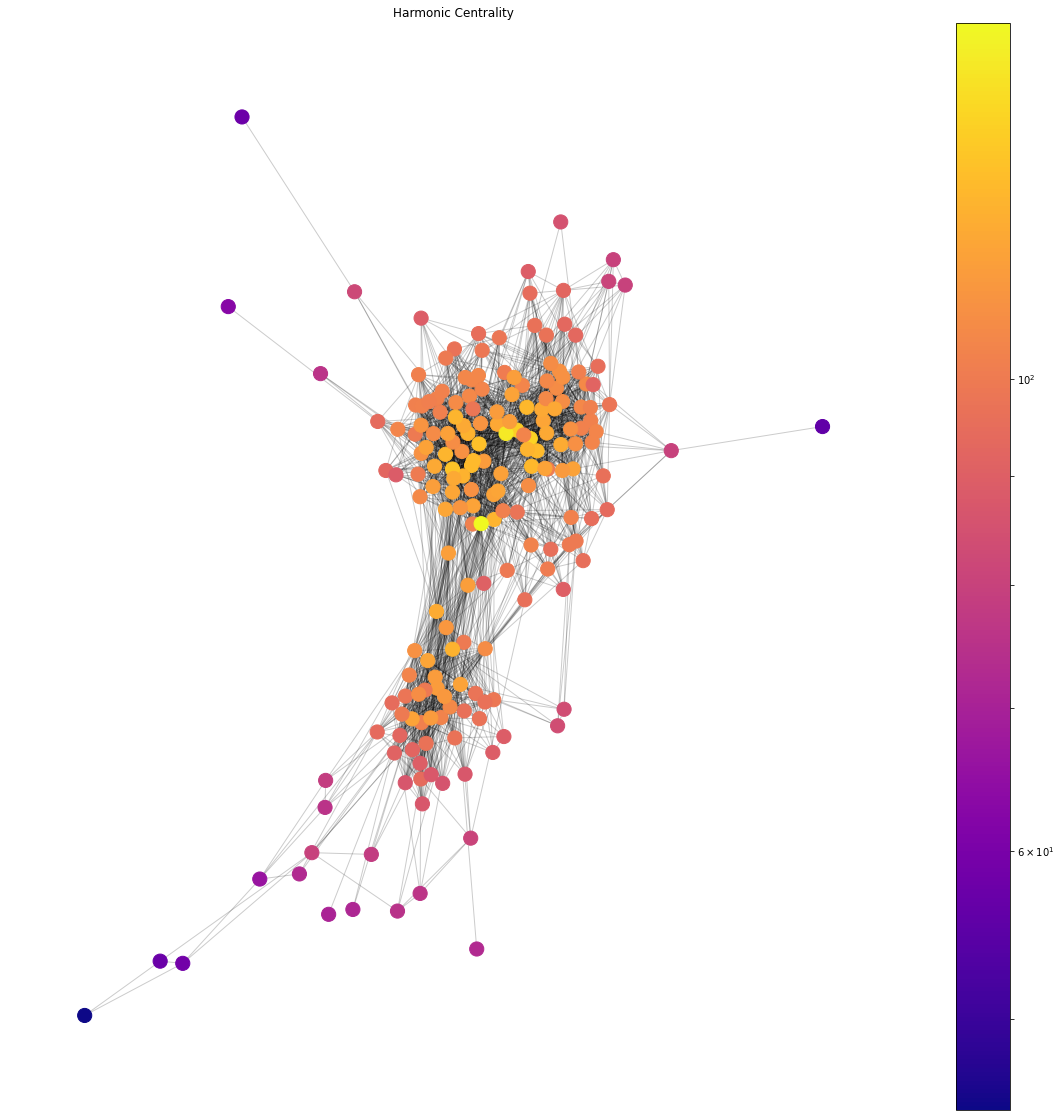

In [33]:
draw(G, pos, harmonic, 'Harmonic Centrality')

### **2.5 Eigenvector Centrality**

Una coppia di autovettore (x) e autovalore (λ) è definita dalla relazione: 
*Ax = λx*
- x è un vettore di dimensione N che può essere interpretato come i punteggi dei nodi
- Ax produce un nuovo vettore della stessa dimensione che corrisponde per ogni nodo alla somma dei punteggi ricevuti dai suoi vicini (neighbors)
- l'uguaglianza implica che i nuovi punteggi siano proporzionali ai precedenti

In [34]:
eigen = nx.eigenvector_centrality(G)

In [35]:
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
ranks[0:5]

[('7', 0.210407602557835),
 ('20', 0.18434572268355884),
 ('67', 0.1777740535663636),
 ('23', 0.16687432474667022),
 ('18', 0.15531651037408598)]

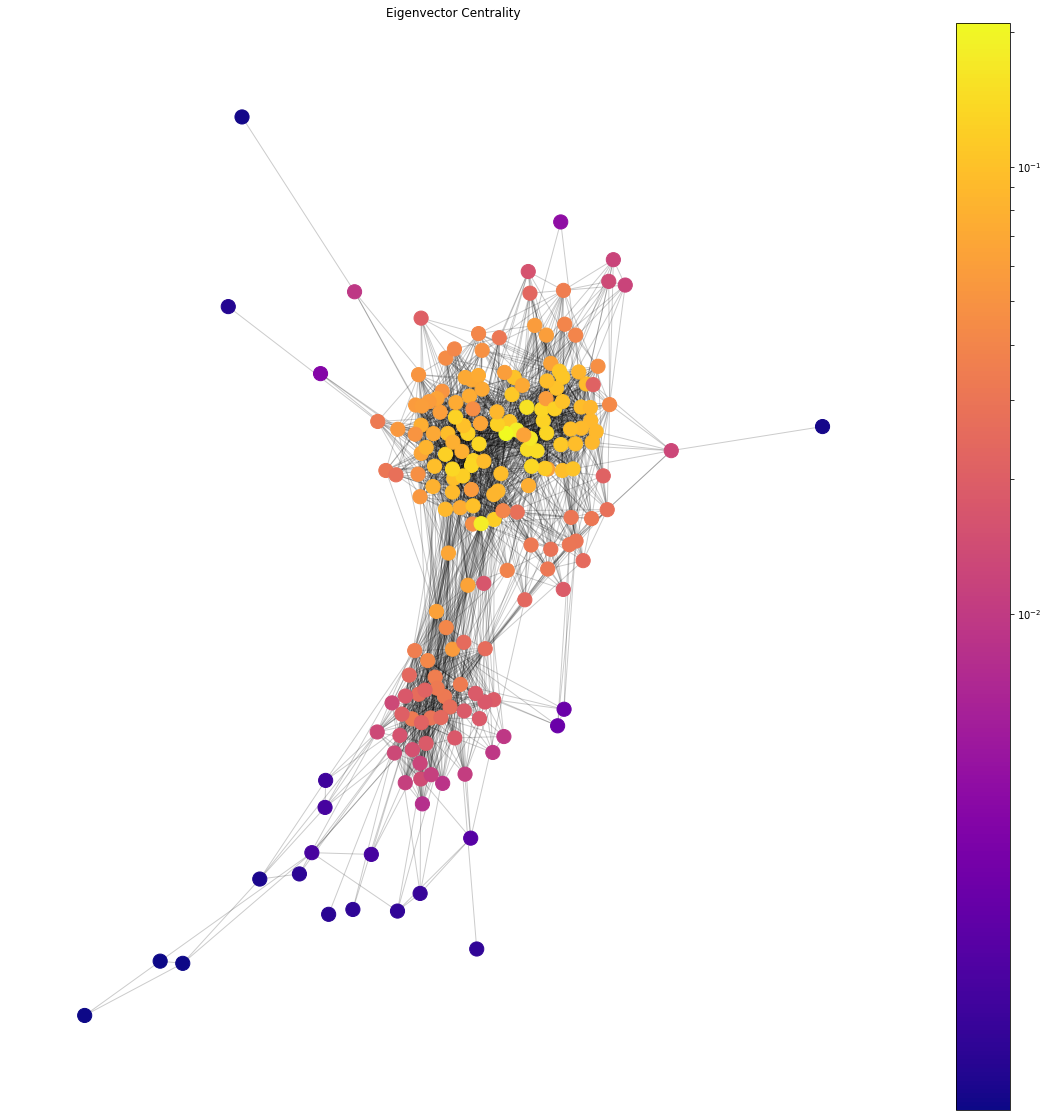

In [36]:
draw(G, pos, eigen, 'Eigenvector Centrality')

### **2.6 Top 5 Centrality**

In questa sezione viene tracciato un istogramma per ogni tipo di centralità, che rappresenta la distribuzione del punteggio sui vari nodi del grafo

In [84]:
from functools import reduce

deg = pd.DataFrame(degree.items(), columns=['nodes', 'Degree Centrality'])
clo = pd.DataFrame(closeness.items(), columns=['nodes', 'Closeness Centrality'])
bet = pd.DataFrame(betweenness.items(), columns=['nodes', 'Betweenness Centrality'])
eig = pd.DataFrame(eigen.items(), columns=['nodes', 'Eigenvector Centrality'])
har = pd.DataFrame(harmonic.items(), columns=['nodes', 'Harmonic Centrality'])
clu = pd.DataFrame(cluster.items(), columns=['nodes', 'Clustering']) 

dfs = [deg, clo, bet, eig, har, clu]
centr_mis = reduce(lambda  left,right: pd.merge(left,right,on=['nodes'], how='inner'), dfs)

In [85]:
centr_mis

,nodes,Degree Centrality,Closeness Centrality,Betweenness Centrality,Eigenvector Centrality,Harmonic Centrality,Clustering
0,1,0.116751,0.429194,0.000851,0.058462,96.700000,0.656126
1,10,0.213198,0.498734,0.013289,0.102054,112.866667,0.483159
2,11,0.203046,0.503836,0.004314,0.105163,112.783333,0.512821
3,12,0.233503,0.511688,0.003418,0.126975,115.700000,0.640580
4,13,0.304569,0.536785,0.014079,0.148182,123.366667,0.464972
...,...,...,...,...,...,...,...
193,163,0.020305,0.390873,0.010152,0.009803,82.283333,0.500000
194,198,0.005076,0.303544,0.000000,0.000829,62.750000,0.000000
195,175,0.045685,0.368914,0.010152,0.012837,79.950000,0.777778
196,162,0.005076,0.281429,0.000000,0.000245,57.650000,0.000000


In [86]:
def create_figure(titolo, righe, colonne, lunghezza, altezza):
  # Genera una figura e la suddivide in più subplots
  fig, axes = plt.subplots(righe,colonne)
  # Imposta la dimensione della figura
  fig.set_size_inches(lunghezza,altezza)
  # Imposta il titolo della figura
  fig.suptitle(titolo, fontsize = 20, y = 0.94)
  # Aumenta lo spazio orizzontale tra due subplot
  plt.subplots_adjust(hspace = 0.4)
  # Restituisce i subplots generati
  return axes

In [89]:
def grafico_centralità(punteggi_centralità, axes):
  # Inizializza gli indici per scorrere i subplot
  i,j = 0,0
  # Traccia un grafico a barre per ciascun punteggio di centralità
  for metrica in punteggi_centralità.columns[1:-1]:
    # Ordina i punteggi di centralità in maniera decrescente e seleziona i primi 5 (top 5)
    data = punteggi_centralità.sort_values([metrica], ascending=False)[0:5]
    # Traccia un grafico a barre dei 5 nodi col punteggio maggiore
    sns.barplot(data["nodes"], data[metrica], ax = axes[j][i])
    # Imposta il titolo del subplot
    axes[j][i].set_title(metrica, pad=20)
    # Aggiorna gli indici che scorrono i subplot
    i,j = (0,j+1) if i == 1 else (i+1,j)

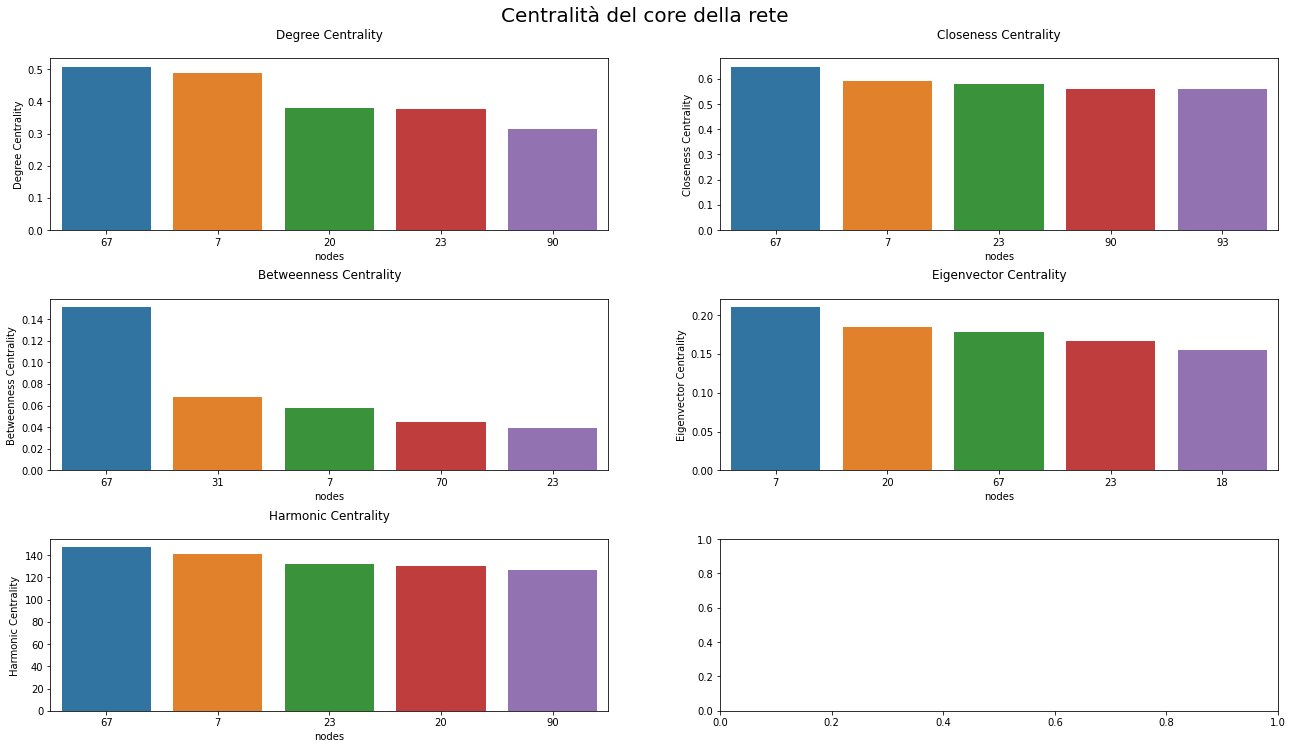

In [97]:
# Crea una figura con 4 subplot
axes = create_figure("Centralità del core della rete",3,2,22,12)
# Traccia il grafico dei punteggi di centralità per il core della rete
grafico_centralità(centr_mis, axes)

### **2.7 Distribuzione delle centralità**

In questa sezione viene tracciato un istogramma per ogni tipo di centralità, che rappresenta la distribuzione del punteggio sui vari nodi del grafo

In [94]:
def distribuzione_centralità(punteggi_centralità, axes):
  # Inizializza gli indici per scorrere i subplot
  i,j = 0,0
  # Traccia un grafico a barre per ciascun punteggio di centralità
  for metrica in punteggi_centralità.columns[1:-1]:
    # Traccia l'istogramma che rappresenta la distribuzione del punteggio di centralità selezionato
    sns.distplot(punteggi_centralità[metrica], ax = axes[j][i])
    # Imposta il titolo del subplot
    axes[j][i].set_title(metrica, pad=20)
    # Aggiorna gli indici che scorrono i subplot
    i,j = (0,j+1) if i == 1 else (i+1,j)

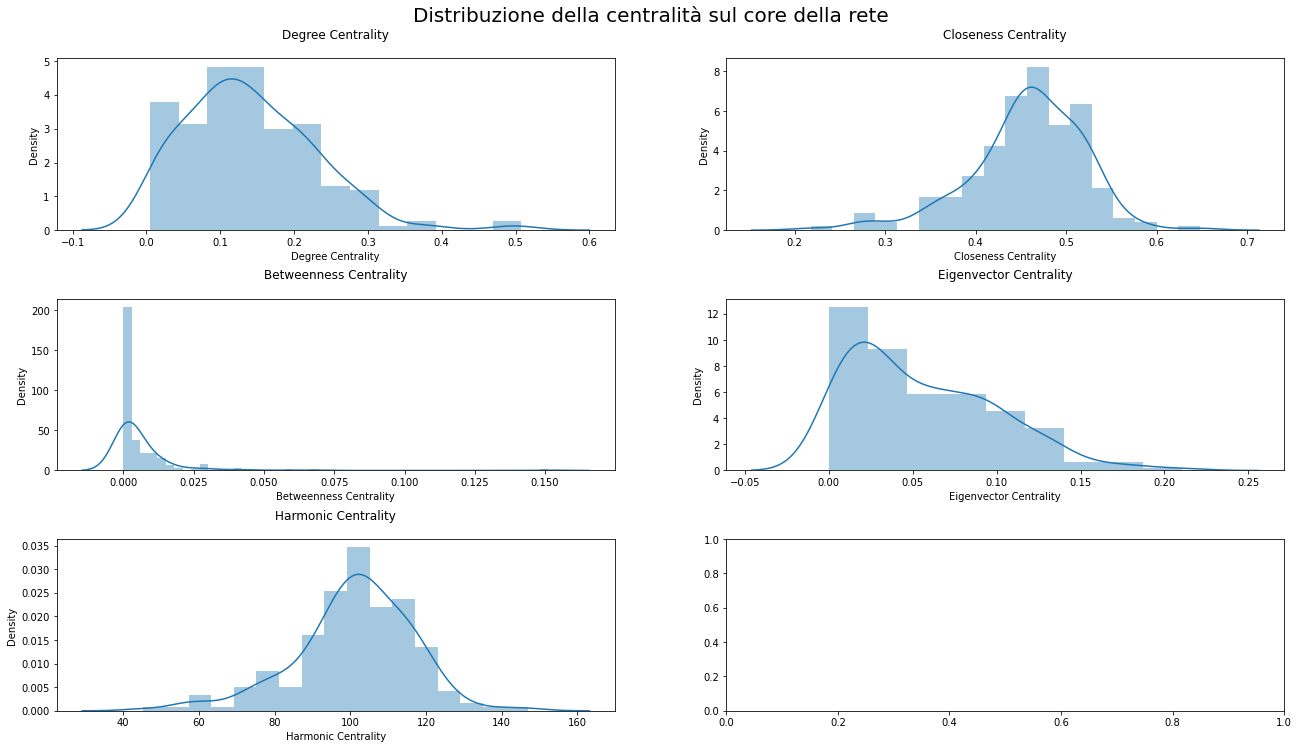

In [96]:
# Crea una figura con 4 subplot
axes = create_figure("Distribuzione della centralità sul core della rete",3,2,22,12)
# Traccia il grafico dei punteggi di centralità per il core della rete
distribuzione_centralità(centr_mis, axes)

### **2.8 Grafo delle centralità**

In questa sezione per ogni tipo di centralità viene tracciato il grafo, associando ai vari nodi un colore proporzionale al punteggio considerato.

In [98]:
def grafo_centralità(graph, punteggi_centralità, axes, labels=None):
  # Inizializza gli indici per scorrere i subplot
  i,j = 0,0
  # Calcola il layout del grafo
  pos = nx.circular_layout(graph) if labels else nx.spring_layout(graph)
  # Traccia un grafico a barre per ciascun punteggio di centralità
  for metrica in punteggi_centralità.columns[1:-1]:
    # Disegna i nodi della rete
    data = nx.draw_networkx_nodes(graph, pos, node_color=punteggi_centralità[metrica], ax=axes[j][i])
    # Disegna le etichette sui nodi
    if labels: nx.draw_networkx_labels(graph, pos, labels=labels, font_size=6, font_weight="bold", ax=axes[j][i])
    # Disegna gli archi della rete
    nx.draw_networkx_edges(graph, pos, ax=axes[j][i])
    # Imposta il colore dei nodi della rete
    data.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
    # Imposta il titolo del subplot
    axes[j][i].set_title("Heatmap "+metrica, pad=20)
    # Aggiunge la color bar all'asse corrente
    plt.colorbar(data, ax=axes[j][i])
    # Aggiorna gli indici che scorrono i subplot
    i,j = (0,j+1) if i == 1 else (i+1,j)

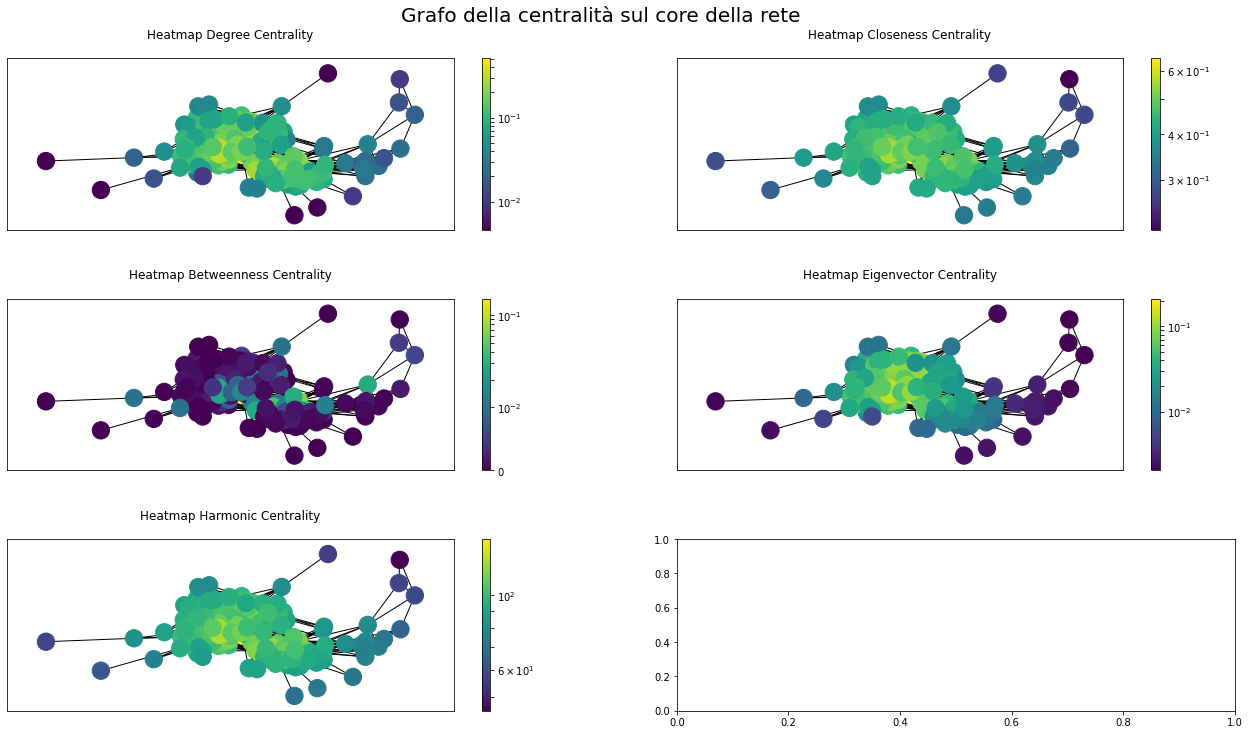

In [99]:
# Crea una figura con 4 subplot
axes = create_figure("Grafo della centralità sul core della rete",3,2,22,12)
# Traccia il grafo dei punteggi di centralità per il core della rete
grafo_centralità(G, centr_mis, axes)